In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


data = pd.read_csv('sprint3_transactions.csv')


X = data.drop(columns=['Class'])  
y = data['Class']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

#Reshape for CNN + LSTM model, simulating 2D spatial data followed by sequence length (1D)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [2]:
from tensorflow.keras.utils import to_categorical

#Encode labels
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten, TimeDistributed

model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None, X_train.shape[2], 1)),
    TimeDistributed(MaxPooling1D(pool_size=2)),
    TimeDistributed(Flatten()),
    LSTM(50, activation='relu'),
    Dense(100, activation='relu'),
    Dense(y_train_encoded.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/Users/DaveManderson/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, None, 28, 64)   │           256 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, None, 14, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, None, 896)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50)             │       189,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 194,958 (761.55 KB)

 Trainable params: 194,958 (761.55 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(X_train, y_train_encoded, epochs=100, validation_split=0.2)

Epoch 1/100
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9954 - loss: 0.0285 - val_accuracy: 0.9982 - val_loss: 0.0075
Epoch 2/100
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9981 - loss: 0.0092 - val_accuracy: 0.9983 - val_loss: 0.0070
Epoch 3/100
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9983 - loss: 0.0072 - val_accuracy: 0.9986 - val_loss: 0.0052
Epoch 4/100
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9984 - loss: 0.0063 - val_accuracy: 0.9988 - val_loss: 0.0054
Epoch 5/100
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9984 - loss: 0.0066 - val_accuracy: 0.9988 - val_loss: 0.0053
Epoch 6/100
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9985 - loss: 0.0052 - val_accuracy: 0.9990 - val_loss: 0.0040
Epoch 7/100
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9987 - loss: 0.0042 - val_accuracy: 0.9988 - val_loss: 0.0050
Epoch 8/100
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9990 -

Epoch 50/100
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9998 - loss: 9.4955e-04 - val_accuracy: 0.9990 - val_loss: 0.0086
Epoch 51/100
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9989 - val_loss: 0.0080
Epoch 52/100
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9983 - val_loss: 0.0106
Epoch 53/100
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9997 - loss: 0.0029 - val_accuracy: 0.9993 - val_loss: 0.0051
Epoch 54/100
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9998 - loss: 8.7734e-04 - val_accuracy: 0.9990 - val_loss: 0.0086
Epoch 55/100
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9997 - loss: 0.0035 - val_accuracy: 0.9992 - val_loss: 0.0093
Epoch 56/100
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9997 - loss: 0.0020 - val_accuracy: 0.9992 - val_loss: 0.0051
Epoch 57/100
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - ac

4716/4716 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9998 - loss: 0.0018 - val_accuracy: 0.9991 - val_loss: 0.0107
Epoch 99/100
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 541s 115ms/step - accuracy: 0.9998 - loss: 0.0020 - val_accuracy: 0.9993 - val_loss: 0.0066
Epoch 100/100
4716/4716 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9999 - loss: 7.8679e-04 - val_accuracy: 0.9992 - val_loss: 0.0082


In [5]:
performance = model.evaluate(X_test, y_test_encoded)
print(f"Test Loss: {performance[0]}, Test Accuracy: {performance[1]}")

1474/1474 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - accuracy: 0.9993 - loss: 0.0111
Test Loss: 0.0106427613645792, Test Accuracy: 0.9992154240608215


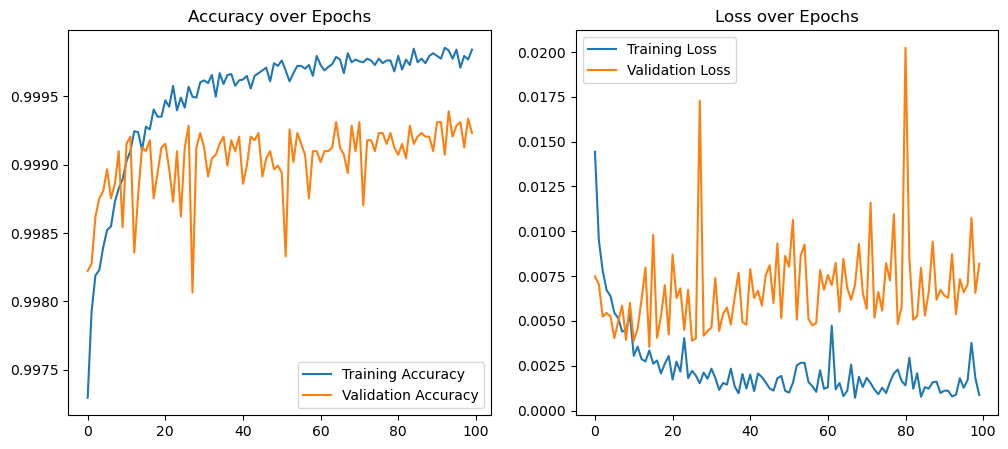

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.show()